In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/107.7 GB disk)


Mounted at /content/drive


In [ ]:
!git clone --q https://github.com/ultralytics/ultralytics.git

root_path = "/content/drive/MyDrive/Resistor_Segmentation"

In [ ]:
%cd /content/drive/MyDrive/Resistor_Segmentation

/content/drive/MyDrive/Resistor_Segmentation


In [ ]:
!pwd

!ls

/content/drive/MyDrive/Resistor_Segmentation
data.yaml		     RS.ipynb	 yolov8n.pt.4a7baf2904234bfaabb5e37f90ea1d0c.partial
Resistor_data		     runs	 yolov8s.pt
Resistor_segmentation.ipynb  yolov8n.pt  yolov8s-seg.pt


In [ ]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=data.yaml epochs=100 imgsz=640 save=true

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 5, in <module>
    from ultralytics.yolo.cfg import entrypoint
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/__init__.py", line 5, in <module>
    from ultralytics.yolo.engine.model import YOLO
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/__init__.py", line 3, in <module>
    from . import v8
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/v8/__init__.py", line 3, in <module>
    from ultralytics.yolo.v8 import classify, detect, segment
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/v8/classify/__init__.py", line 3, in <module>
    from ultralytics.yolo.v8.classify.predict import ClassificationPredictor, predict
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/v8/classify/predict.py", line 6, in <module>
    from ultralytics.yolo.engine.predictor import BasePredictor
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/en

In [ ]:
!yolo task=detect mode=predict model = '/content/drive/MyDrive/Resistor_Segmentation/runs/segment/train13/weights/best.pt' conf = 0.25 source = '/content/drive/MyDrive/images/16.jpg'

WARNING ⚠️ 'task=detect' conflicts with segment model /content/drive/MyDrive/Resistor_Segmentation/runs/segment/train13/weights/best.pt. Inheriting 'task=segment' from /content/drive/MyDrive/Resistor_Segmentation/runs/segment/train13/weights/best.pt and ignoring 'task=detect'.
2023-12-02 11:45:26.359041: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /content/drive/MyDrive/images/16.jpg: 480x640 1 Resistor, 823.7ms
Speed: 6.2ms pre-process, 823.7ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict48


In [ ]:
model = YOLO('/content/drive/MyDrive/Resistor_Segmentation/runs/segment/train13/weights/best.pt')
original_image = cv2.imread('/content/drive/MyDrive/images/16.jpg')
predict = model.predict(original_image, save = True , save_txt = True)


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

0: 480x640 1 Resistor, 734.8ms
Speed: 2.4ms pre-process, 734.8ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict49
1 label saved to runs/segment/predict49/labels


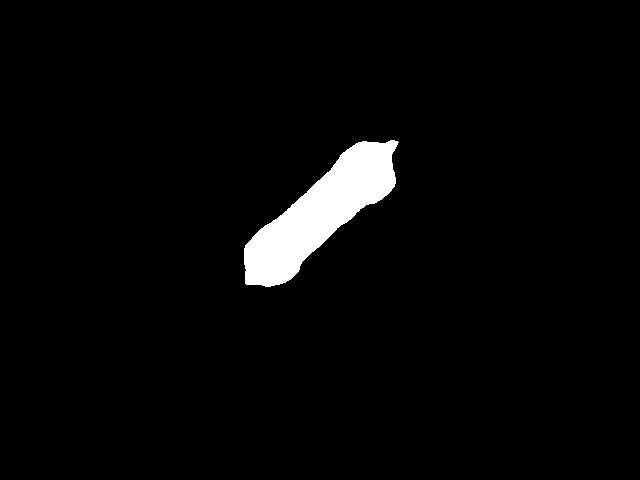

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
cuda_tensor = predict[0].masks.masks[0]

# Move the tensor from GPU to CPU
cpu_tensor = cuda_tensor.cpu()

# Convert to NumPy array
numpy_array = (cpu_tensor.numpy() * 255).astype("uint8")
cv2_imshow(numpy_array)
cv2.waitKey(0)
cv2.destroyAllWindows()


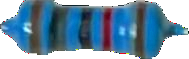

In [ ]:
import numpy as np
import cv2
original_image = cv2.imread("/content/drive/MyDrive/images/17.png")
mask = (cpu_tensor.numpy() * 255).astype("uint8")

# Ensure the mask and the original image have the same dimensions
mask = cv2.resize(mask, (original_image.shape[1], original_image.shape[0]))

# Find the non-zero indices in the mask
non_zero_indices = np.where(mask > 0)

# Crop the region of interest from the original image
cropped_image = original_image[
    np.min(non_zero_indices[0]):np.max(non_zero_indices[0]) + 1,
    np.min(non_zero_indices[1]):np.max(non_zero_indices[1]) + 1
]
# Ensure the mask and the original image have the same dimensions
mask = cv2.resize(mask, (original_image.shape[1], original_image.shape[0]))

# Invert the mask (0s become 255 and vice versa)
inverse_mask = cv2.bitwise_not(mask)

# Change the non-masked part to white
result = cv2.bitwise_and(original_image, original_image, mask=mask)
result += cv2.merge([inverse_mask] * cropped_image.shape[2])
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
bounding_box = cv2.boundingRect(contours[0])
cropped_image = result[bounding_box[1]:bounding_box[1] + bounding_box[3],bounding_box[0]:bounding_box[0] + bounding_box[2]]

# Display the cropped image
cv2_imshow(cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()